# 1 Introdução

O desbalanceamento de classes é um problema comum em tarefas de aprendizado de máquina, onde uma ou mais classes estão sub-representadas em comparação com outras. Isso pode levar a modelos enviesados que não generalizam bem para dados desconhecidos.

- Importância de Tratar o Desbalanceamento de Classes
    - Classificação: Em problemas de classificação, modelos podem aprender a predizer majoritariamente a classe dominante, ignorando as classes minoritárias.
    - Regressão: Para problemas de regressão, o desbalanceamento pode afetar a distribuição dos valores alvo, levando a previsões enviesadas.

# 2 Importação de Bibliotecas

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, auc
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

# 3 Carregamento do dataset

## 3.1 Descrição do Dataset

Para este exemplo, utilizaremos o conhecido dataset "Credit Card Fraud Detection". Este dataset contém transações realizadas com cartões de crédito e é utilizado para prever se uma transação é fraudulenta ou não. O dataset é amplamente utilizado em estudos de detecção de fraudes, especialmente devido ao desafio do desbalanceamento de classes, onde as transações fraudulentas representam uma pequena fração do total.

- Principais Características do Dataset:

    - Time: Número de segundos que transcorreram entre a primeira transação no dataset e a transação atual. Pode ajudar a identificar padrões temporais de fraude.
    - V1 a V28: 28 features numéricas que são o resultado de uma transformação de Principal Component Analysis (PCA), aplicada para anonimizar os dados originais. Essas variáveis encapsulam a informação transacional de uma forma que preserva a privacidade dos clientes.
    - Amount: Valor da transação. Essa variável pode ser um indicativo de fraudes, uma vez que transações fraudulentas podem ter padrões específicos de valores.
    - Class: Variável alvo binária que indica se a transação foi fraudulenta (1) ou legítima (0).

- Importância das Variáveis:
    - Time: Pode ser utilizado para analisar padrões temporais, como o horário do dia em que fraudes ocorrem com mais frequência.
    - V1 a V28: As transformações PCA dificultam a interpretação direta dessas variáveis, mas elas são críticas para a modelagem, pois capturam padrões complexos de comportamento de compra.
    - Amount: Frequentemente correlacionado com a probabilidade de fraude, pois fraudes podem estar associadas a transações atípicas em termos de valor.
    - Class: A variável alvo que define o problema de classificação binária, onde o desafio reside em identificar as poucas fraudes (classe 1) dentro de uma massa de transações legítimas (classe 0).

- Fonte do Dataset:

    - O dataset está originalmente disponível no Kaggle: Credit Card Fraud Detection Dataset.


In [2]:
# Caminho para o arquivo ZIP
zip_path = 'datasets/credit_card.zip'

# Nome do arquivo CSV dentro do ZIP
csv_filename = 'credit_card.csv'

# Ler o arquivo CSV diretamente do ZIP
with zipfile.ZipFile(zip_path, 'r') as z:
    with z.open(csv_filename) as f:
        df = pd.read_csv(f)

## 3.2 Exploração inicial dos dados

In [3]:
# Exibir as primeiras linhas do DataFrame
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Checar possível desbalanceamento do dataset
print(f'Tamanho do dataset: {df.shape}')

print(df['Class'].value_counts(normalize=True))

Tamanho do dataset: (284807, 31)
Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64


## 3.3 Criando separação inicial dos dados

In [5]:
# Separação dos dados
X_unbalaced, X_val, y_unbalanced, y_val = train_test_split(df.drop('Class', axis=1), df['Class'], test_size=0.2, random_state=42)

# Concatenação dos dataframes
df_unbalaced = pd.concat([X_unbalaced, y_unbalanced], axis=1)
df_val = pd.concat([X_val, y_val], axis=1)

In [6]:
# Checar possível desbalanceamento do dataset df_unbalanced
print(f'Tamanho do dataset: {df_unbalaced.shape}')

print(df_unbalaced['Class'].value_counts(normalize=True))

Tamanho do dataset: (227845, 31)
Class
0    0.998271
1    0.001729
Name: proportion, dtype: float64


In [7]:
# Checar possível desbalanceamento do dataset df_val
print(f'Tamanho do dataset: {df_val.shape}')

print(df_val['Class'].value_counts(normalize=True))

Tamanho do dataset: (56962, 31)
Class
0    0.99828
1    0.00172
Name: proportion, dtype: float64


# 4 Técnicas para Lidando com Desbalanceamento de Classes

## 4.1 Under-sampling

Under-sampling: Reduz o número de exemplos da classe majoritária para equilibrar as classes.

In [8]:
# Aplicação de Under-sampling
undersample = RandomUnderSampler(sampling_strategy=.5)
X_under, y_under = undersample.fit_resample(df_unbalaced.drop('Class', axis=1), df_unbalaced['Class'])

In [9]:
# Checar possível desbalanceamento do dataset
print(f'Tamanho do dataset: {y_under.shape}')

print(y_under.value_counts(normalize=True))

Tamanho do dataset: (1182,)
Class
0    0.666667
1    0.333333
Name: proportion, dtype: float64


## 4.2 Over-sampling

Over-sampling: Aumenta o número de exemplos da classe minoritária através de replicação ou geração de novos exemplos (e.g., SMOTE).

In [10]:
# Aplicação de Over-sampling (SMOTE)
smote = SMOTE(sampling_strategy=1.0)
X_smote, y_smote = smote.fit_resample(df_unbalaced.drop('Class', axis=1), df_unbalaced['Class'])

In [11]:
# Checar possível desbalanceamento do dataset
print(f'Tamanho do dataset: {y_smote.shape}')

print(y_smote.value_counts(normalize=True))

Tamanho do dataset: (454902,)
Class
0    0.5
1    0.5
Name: proportion, dtype: float64


# 5 Exemplo de ML: Comparando Resultados

## 5.1 Comparando o desempenho nos dados desbalanceados

In [12]:
# Treinando o modelo sem pesos ajustados
model = RandomForestClassifier()
model.fit(df_unbalaced.drop(['Class'], axis=1), df_unbalaced['Class'])

# Avaliação do modelo nos dados de Validação
y_pred_unbalanced = model.predict(df_val.drop(['Class'], axis=1))
print(classification_report(df_val['Class'], y_pred_unbalanced))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.79      0.87        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962



In [13]:
# Treinando o modelo com pesos ajustados
model_weighted = RandomForestClassifier(class_weight='balanced')
model_weighted.fit(df_unbalaced.drop(['Class'], axis=1), df_unbalaced['Class'])

# Avaliação do modelo nos dados de Validação
y_pred_class_weight = model_weighted.predict(df_val.drop(['Class'], axis=1))
print(classification_report(df_val['Class'], y_pred_class_weight))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.99      0.76      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962



## 5.2 Comparando o desempenho nos dados balanceados - Under-sampling

In [14]:
# Treinamento do modelo nos dados balancedados - Under-sampling
model_under = RandomForestClassifier()
model_under.fit(X_under, y_under)

# Avaliação do modelo nos dados de Validação
y_pred_under = model_under.predict(df_val.drop(['Class'], axis=1))
print(classification_report(df_val['Class'], y_pred_under))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.22      0.91      0.35        98

    accuracy                           0.99     56962
   macro avg       0.61      0.95      0.67     56962
weighted avg       1.00      0.99      1.00     56962



## 5.3 Comparando o desempenho nos dados balanceados - SMOTE

In [15]:
# Treinamento do modelo nos dados balancedados - SMOTE
model_smote = RandomForestClassifier()
model_smote.fit(X_smote, y_smote)

# Avaliação do modelo nos dados de Validação
y_pred_smote = model_smote.predict(df_val.drop(['Class'], axis=1))
print(classification_report(df_val['Class'], y_pred_smote))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.85      0.86        98

    accuracy                           1.00     56962
   macro avg       0.94      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962



# 6 Comparação Gráfica dos Resultados

## 6.1 Pequena Explicação

A curva ROC (Receiver Operating Characteristic) é uma ferramenta gráfica utilizada para avaliar o desempenho de um modelo de classificação binária. Ela é construída ao plotar a taxa de verdadeiros positivos (True Positive Rate - TPR) contra a taxa de falsos positivos (False Positive Rate - FPR) para diferentes limiares de classificação.

- Componentes Principais da Curva ROC:
    - True Positive Rate (TPR): Também conhecido como sensibilidade ou recall, representa a proporção de positivos corretamente identificados pelo modelo.
    - False Positive Rate (FPR): Representa a proporção de negativos que foram incorretamente classificados como positivos pelo modelo.
​
- Interpretação da Curva ROC:
    - Diagonal (linha pontilhada): Representa um modelo que faz classificações aleatórias, ou seja, não é melhor do que um chute.
    - Curva próxima ao canto superior esquerdo: Indica um bom desempenho do modelo, com alta taxa de verdadeiros positivos e baixa taxa de falsos positivos.
    - AUC (Área Sob a Curva): Um valor que resume a curva ROC em um único número, variando de 0 a 1. Quanto mais próximo de 1, melhor o modelo.

No contexto de modelos desbalanceados, a curva ROC e a AUC são especialmente úteis, pois oferecem uma visão mais completa da capacidade do modelo em distinguir entre as classes, independentemente do limiar de decisão escolhido.

In [16]:
# Curva ROC para comparação entre modelos
fpr_unbalanced, tpr_unbalanced, _ = roc_curve(df_val['Class'], y_pred_unbalanced)
fpr_class_weight, tpr_class_weight, _ = roc_curve(df_val['Class'], y_pred_class_weight)
fpr_under, tpr_under, _ = roc_curve(df_val['Class'], y_pred_under)
fpr_smote, tpr_smote, _ = roc_curve(df_val['Class'], y_pred_smote) 

# Calculando a AUC para cada modelo
auc_unbalanced = roc_auc_score(df_val['Class'], y_pred_unbalanced)
auc_class_weight = roc_auc_score(df_val['Class'], y_pred_class_weight)
auc_under = roc_auc_score(df_val['Class'], y_pred_under)
auc_smote = roc_auc_score(df_val['Class'], y_pred_smote)

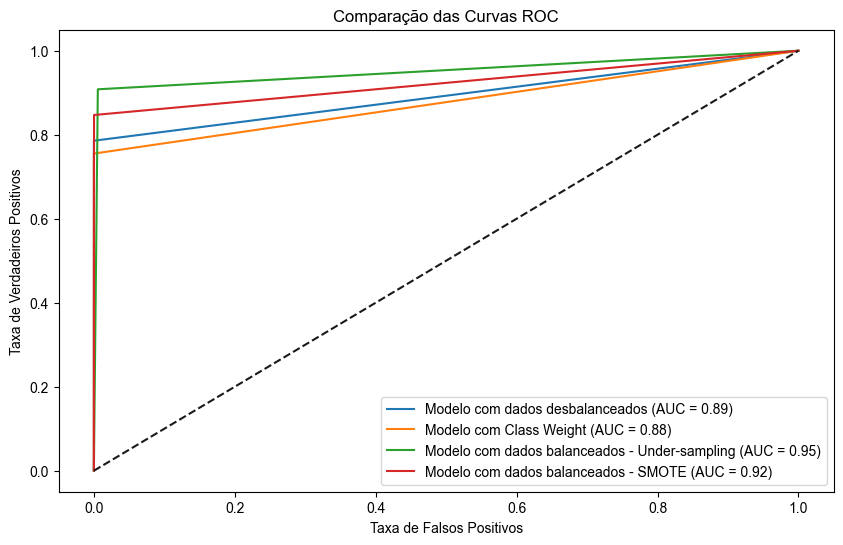

In [17]:
# Plotando as curvas ROC com AUC nas legendas
plt.figure(figsize=(10, 6))
plt.plot(fpr_unbalanced, tpr_unbalanced, label=f"Modelo com dados desbalanceados (AUC = {auc_unbalanced:.2f})")
plt.plot(fpr_class_weight, tpr_class_weight, label=f"Modelo com Class Weight (AUC = {auc_class_weight:.2f})")
plt.plot(fpr_under, tpr_under, label=f"Modelo com dados balanceados - Under-sampling (AUC = {auc_under:.2f})")
plt.plot(fpr_smote, tpr_smote, label=f"Modelo com dados balanceados - SMOTE (AUC = {auc_smote:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Linha diagonal representando um modelo aleatório
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Comparação das Curvas ROC')
plt.legend()

# Configurando o estilo do seaborn para 'darkgrid'
sns.set(style="darkgrid")

plt.show()